In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Load the data from the Excel file
file_paths = {
    'California': r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\data\CO2\washington\harmonicmean\results\n2o_was_forecasted_results.xlsx'
}

# Define variables for the plot
sheetname = "hm_forecast_Mid-case_N2O_Emissi"
scenario = 'CO2'
color = 'Blues'
filename = 'n2o_was_matrix'

def load_and_process_data(file_path, sheet_name):
    # Load the data from the Excel sheet
    df = pd.read_excel(file_path, sheet_name=sheetname)
    
    # Convert ds to datetime
    df['ds'] = pd.to_datetime(df['ds'])
    
    # Convert emissions from g/MWh to ton/TWh
    df['emission'] = df['yhat']
    
    return df

def plot_heatmap(df):
    # Define the y-axis range
    ev_increase = np.linspace(0, 10, 100)
    
    # Create an array for months across all years in the dataset
    months = pd.date_range(start=df['ds'].min(), end=df['ds'].max(), freq='M')
    # Create a meshgrid for months and EV energy consumption increase
    X, Y = np.meshgrid(months, ev_increase)
    
    # Generate emission data for heatmap
    Z = np.zeros((len(ev_increase), len(months)), dtype=float)

    for i, em in df.iterrows():
        Zi = em['emission'] * ev_increase
        rows = Z.shape[0]
        for j in range(rows):
            if i < Z.shape[1]:
                Z[j, i] = Zi[j]
    
    # Create a DataFrame with the EV Increase and months
    columns = ['EV Increase'] + [str(date) for date in months]
    Z_df = pd.DataFrame(data=np.hstack([ev_increase.reshape(-1, 1), Z]), columns=columns)
    
    # Save the DataFrame to a CSV file
    Z_df.to_csv(filename+'.csv', index=False)

df = load_and_process_data(file_paths['California'], sheetname)

# Plot the heatmap and save the CSV
plot_heatmap(df)

C:\Users\skanigir\AppData\Local\Temp\ipykernel_1320\2567586052.py:27: UserWarning: Log scale: values of z <= 0 have been masked
  contour = plt.contourf(data.columns, data.index, data, cmap='Blues', levels=levels, norm=LogNorm())


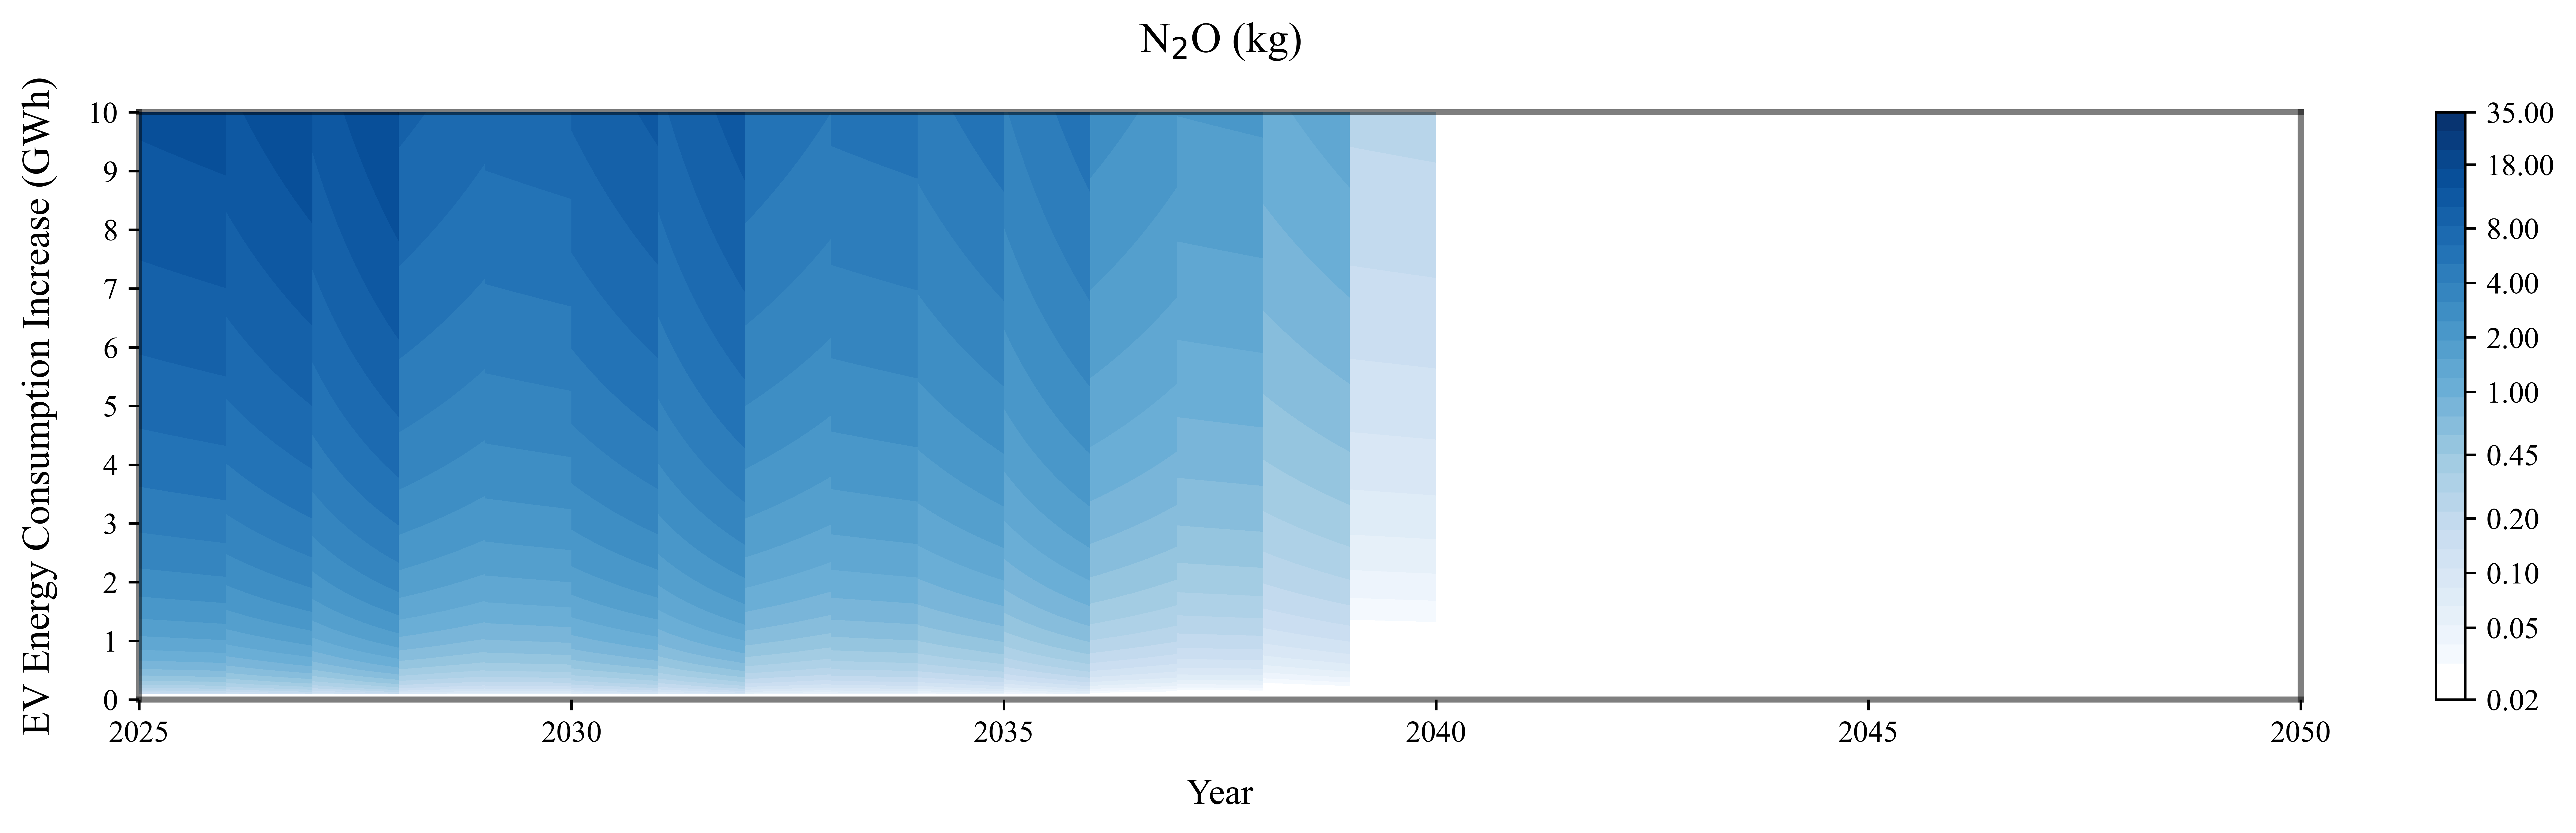

In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from matplotlib.ticker import FuncFormatter

Emission = "N$_2$O (kg)"
output_path = r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\graphs'
figure = '2_c_3'
# Load the dataset from the provided CSV file
file_path = r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\code\n2o_new_matrix.csv'
data = pd.read_csv(file_path, index_col=0)

# Clean the data by replacing NaN and Inf values
data = data.replace([np.inf, -np.inf], np.nan).dropna(axis=1, how='all').dropna(axis=0, how='all')

# Extract the years from the column names
data.columns = pd.to_datetime(data.columns).year

# Set default font family to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Create the contour plot with custom levels
plt.figure(figsize=(16, 3.5), dpi=800)

levels = np.logspace(-1.5, np.log10(35), 30)
contour = plt.contourf(data.columns, data.index, data, cmap='Blues', levels=levels, norm=LogNorm())
#print(data)

# Add colorbar
colorbar = plt.colorbar(contour)
#colorbar.set_label('Emission (ton)', fontsize=12)

# Customize colorbar ticks to show normal decimals
colorbar_ticks = [0.02, 0.05, 0.10, 0.20, 0.45, 1.00, 2.00, 4.00,8.00,18.00,35.00]
colorbar.set_ticks(colorbar_ticks)

# Define function to format ticks
def format_func(value, tick_number):
    return f'{value:.2f}'

# Apply the formatter to the colorbar
colorbar.ax.yaxis.set_major_formatter(FuncFormatter(format_func))

# Set font sizes for plot labels and titles
plt.xlabel('Year', fontsize=12, labelpad=10)
plt.ylabel('EV Energy Consumption Increase (GWh)', fontsize=13, labelpad=10)
plt.title(Emission, fontsize=14, pad=20, loc='center')

# Customize x-axis ticks to show specific years, ensuring 2025 and 2050 are included
years = data.columns
tick_years = np.linspace(years.min(), years.max(), 6, dtype=int)
if 2025 not in tick_years:
    tick_years = np.append(tick_years, 2025)
if 2050 not in tick_years:
    tick_years = np.append(tick_years, 2050)
tick_years = np.sort(tick_years)

plt.xticks(tick_years, fontsize=10)

# Customize y-axis ticks with integers from 0 to 10
ev_increase = np.linspace(0, 10, 11, dtype=int)
plt.yticks(ev_increase[::1], fontsize=10)  # Show ticks every 1 unit

# Set the box border color to dark gray
ax = plt.gca()

# Remove grid
ax.grid(False)
# Set dark black border
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_alpha(0.5)
    spine.set_linewidth(2)

# Save the plot as an SVG file
plt.savefig(f'{output_path}/{figure}.svg', format='svg')

plt.show()
